### Data visualiations
1. Based on the lat long uniform random, we get a good spread across the globe
2. Temperature seems very correlated with the Latitude, peaking at the equator.
3. Humidity seems to have no correlation with Latitude, evenly spread across all laittudes.

In [1]:
from citipy import citipy
import csv
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import numpy as np


In [2]:
citylist = []
for x in range(5000):
    s = np.random.uniform(90,-90,1)
    x = np.random.uniform(180,-180,1)
    city = citipy.nearest_city(s[0], x[0])
    citylist.append(city.city_name)


        

In [3]:
city_pd = pd.DataFrame(citylist)
city_pd.columns = ['City']
citydf = city_pd.drop_duplicates('City')
citysample = (citydf['City'].sample(900)).reset_index(drop = True)
citysdf = pd.DataFrame(citysample)


In [4]:
citysdf.head()

,City
0,shanhetun
1,busselton
2,ewo
3,hithadhoo
4,tsuruga


In [5]:
# Save config information.
api_key = "3e7478a50e735209077640bfd2bf6266"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
query_url


'http://api.openweathermap.org/data/2.5/weather?appid=3e7478a50e735209077640bfd2bf6266&units=imperial&q='

In [6]:
weather_data = []
cities = citysdf['City']

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = req.get(query_url + city).json()
    weather_data.append(response)


In [8]:
weather_data[0]['coord']

{'lat': 44.7, 'lon': 127.2}

In [9]:
x_temp = []
x_humid = []
x_speed = []
x_cloud = []
y_lat = []
y_lng = []

for city in weather_data:
    try:
        temp = city['main']['temp_max']
        x_temp.append(temp)
        humid = city['main']['humidity']
        x_humid.append(humid)
        speed = city['wind']['speed']
        x_speed.append(speed)
        cloud = city['clouds']['all']
        x_cloud.append(cloud)
        lat = city['coord']['lat']
        y_lat.append(lat)
        lng = city['coord']['lon']
        y_lng.append(lng)
        
    except:
            
        continue
        

In [10]:
y_lng[0]


127.2

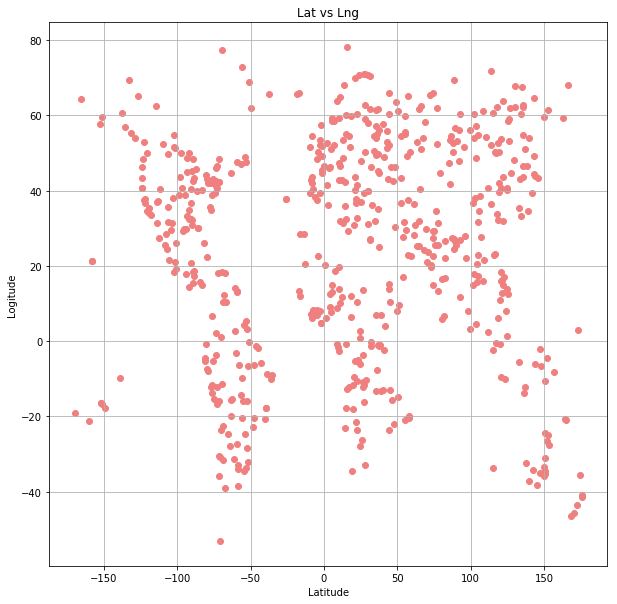

In [34]:
plt.figure(figsize = (10,10))
plt.title("Lat vs Lng")
plt.xlabel("Latitude")
plt.ylabel("Logitude")

plt.scatter(y_lng, y_lat, marker="o", color="lightcoral", label = 'City')
plt.grid()
plt.show()

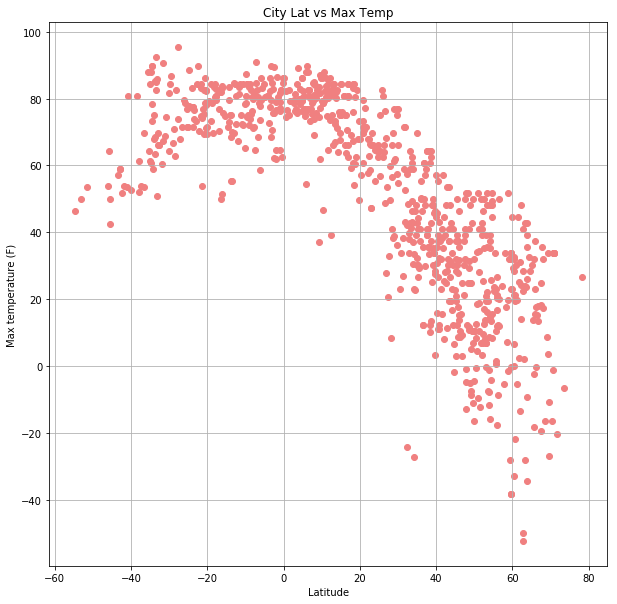

In [11]:
plt.figure(figsize = (10,10))
plt.title("City Lat vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (F)")

plt.scatter(y_lat, x_temp, marker="o", color="lightcoral", label = 'City')
plt.grid()
plt.show()

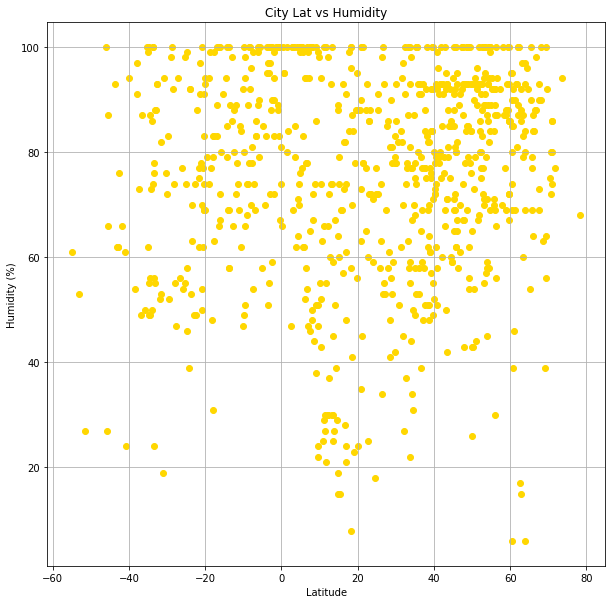

In [12]:
plt.figure(figsize = (10,10))
plt.title("City Lat vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(y_lat, x_humid, marker="o", color="gold", label = 'City')
plt.grid()
plt.show()

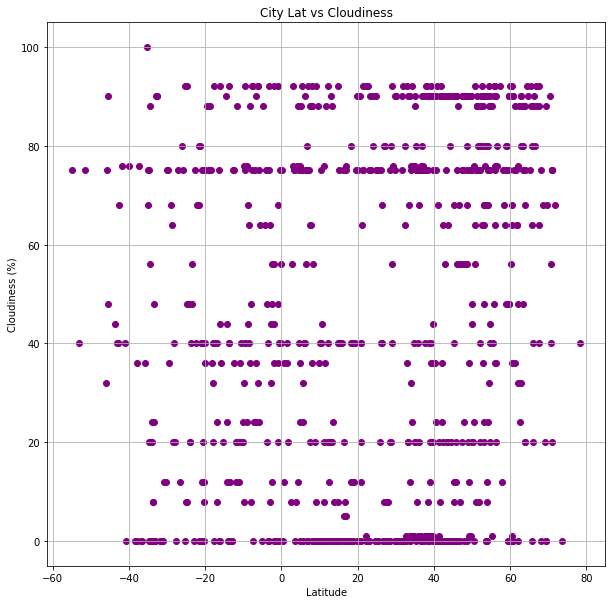

In [13]:
plt.figure(figsize = (10,10))
plt.title("City Lat vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(y_lat, x_cloud, marker="o", color="purple", label = 'City')
plt.grid()
plt.show()

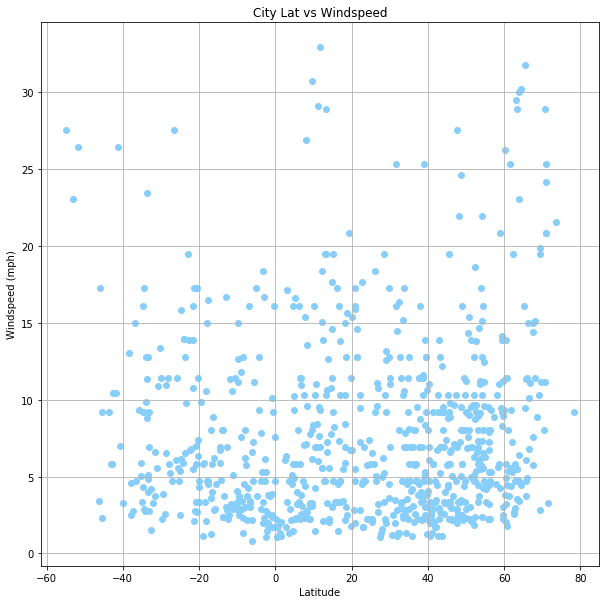

In [14]:
plt.figure(figsize = (10,10))
plt.title("City Lat vs Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")

plt.scatter(y_lat, x_speed, marker="o", color="lightskyblue", label = 'City')
plt.grid()
plt.show()